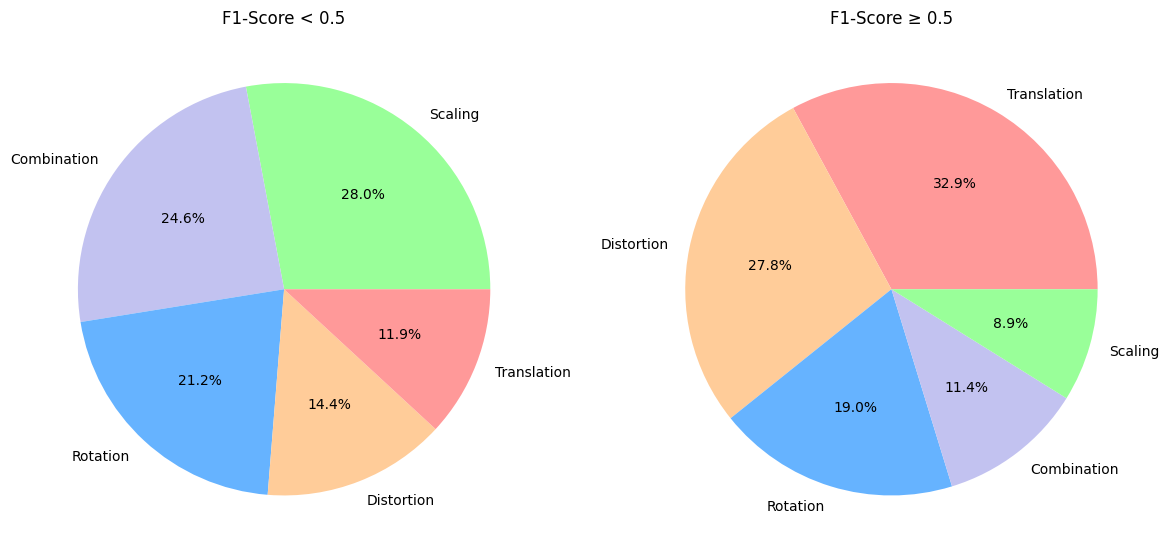

In [ ]:
import pandas as pd ; import matplotlib.pyplot as plt

# Load your UNET summary file
df = pd.read_csv("../Results/DCT/Summary-DCT.csv")
f1_threshold = 0.5

# Create transformation category map
def get_transformation(image_name):
    img_id = int(image_name.split('_')[0])
    if 1 <= img_id <= 40:
        return 'Translation'
    elif 41 <= img_id <= 80:
        return 'Rotation'
    elif 81 <= img_id <= 120:
        return 'Scaling'
    elif 121 <= img_id <= 160:
        return 'Distortion'
    elif 161 <= img_id <= 200:
        return 'Combination'
    else:
        return 'Unknown'

df['Transformation'] = df['Image Name'].apply(get_transformation)

lower_f1_df = df[df['F1-Score'] < f1_threshold] ; higher_f1_df = df[df['F1-Score'] >= f1_threshold]

# Count by transformation for each subset
lower_counts = lower_f1_df['Transformation'].value_counts() ; higher_counts = higher_f1_df['Transformation'].value_counts()

# Define color map
color_map = { 'Translation': '#FF9999', 'Rotation': '#66B3FF','Scaling': '#99FF99','Distortion': '#FFCC99','Combination': '#C2C2F0'}

plt.figure(figsize=(12, 6)); plt.subplot(1, 2, 1) ; lower_counts.plot.pie(autopct='%1.1f%%', colors=[color_map.get(k) for k in lower_counts.index]) ;
plt.title(f"F1-Score < {f1_threshold}");plt.ylabel('');

plt.subplot(1, 2, 2); higher_counts.plot.pie(autopct='%1.1f%%', colors=[color_map.get(k) for k in higher_counts.index]); plt.title(f"F1-Score ≥ {f1_threshold}"); plt.ylabel('');

plt.tight_layout(); plt.show();

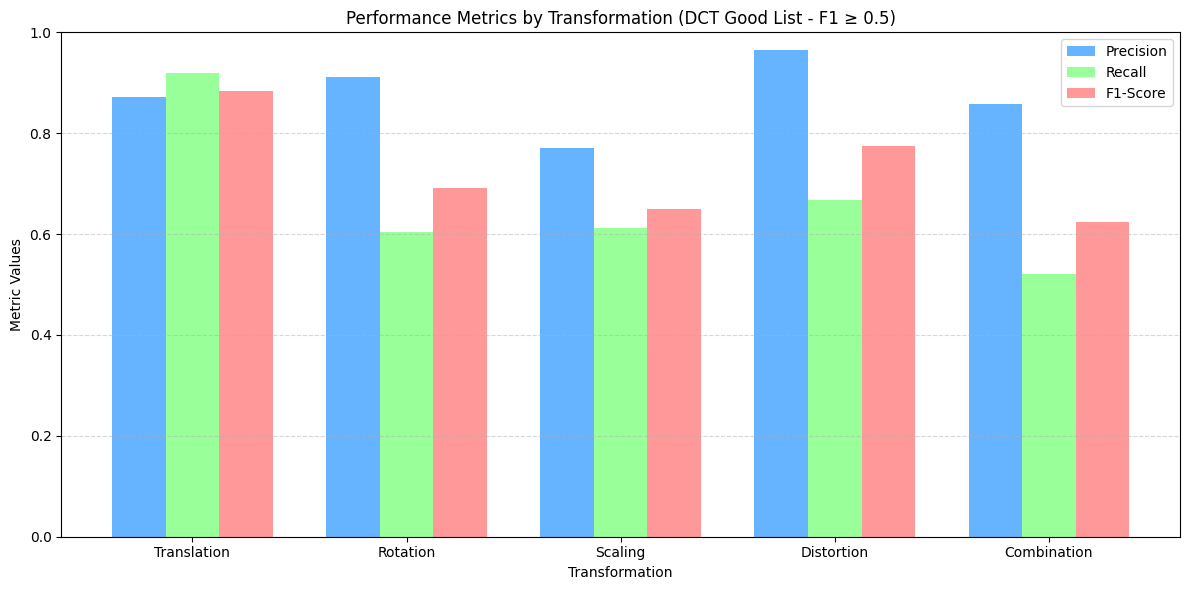

In [ ]:
import pandas as pd; import matplotlib.pyplot as plt; import numpy as np;

df_grouped = pd.read_csv("../Results/DCT/Grouped_HighF1_Summary.csv")

metrics = ['Avg Precision', 'Avg Recall', 'Avg F1-Score']; transformations = df_grouped['Transformation'].tolist(); bar_width = 0.25; x = np.arange(len(transformations));

precision_values = df_grouped['Avg Precision'].values; recall_values = df_grouped['Avg Recall'].values; f1_values = df_grouped['Avg F1-Score'].values; plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, precision_values, width=bar_width, label='Precision', color='#66B3FF'); plt.bar(x, recall_values, width=bar_width, label='Recall', color='#99FF99'); plt.bar(x + bar_width, f1_values, width=bar_width, label='F1-Score', color='#FF9999');
# Labeling
plt.xlabel('Transformation'); plt.ylabel('Metric Values'); plt.title('Performance Metrics by Transformation (DCT Good List - F1 ≥ 0.5)');plt.xticks(x, transformations); plt.ylim(0, 1); plt.grid(axis='y', linestyle='--', alpha=0.5); plt.legend();
plt.tight_layout(); plt.show();

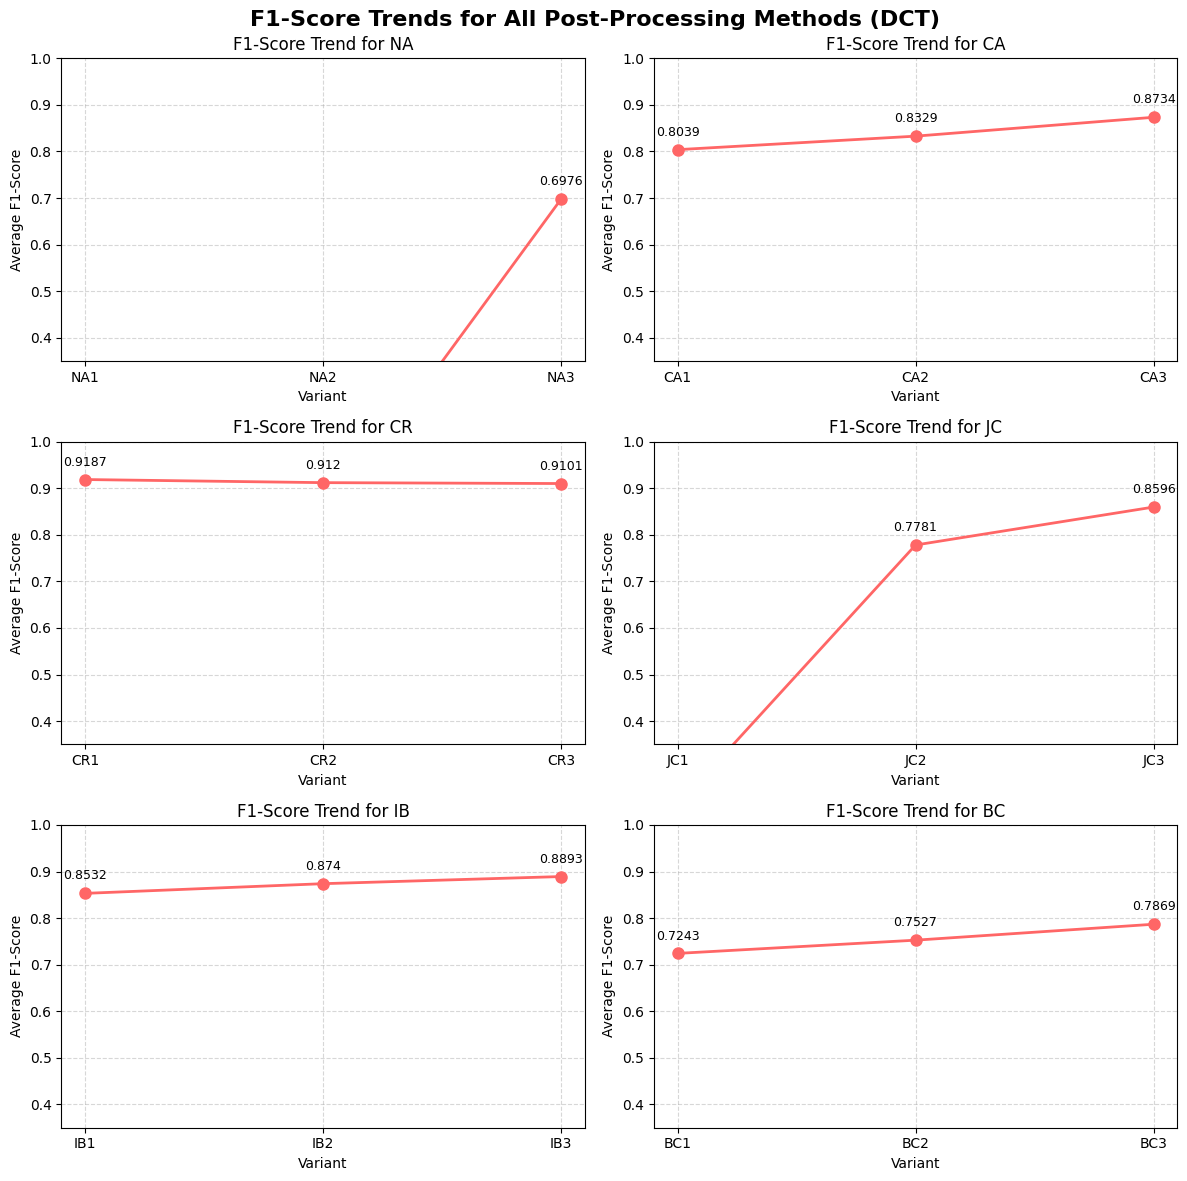

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load required DCT post-processing files
pp_13 = pd.read_csv("../Results/DCT/pp-13.csv")
pp_51 = pd.read_csv("../Results/DCT/pp-51.csv")
pp_120 = pd.read_csv("../Results/DCT/pp-120.csv")
pp_159 = pd.read_csv("../Results/DCT/pp-159.csv")

# Configuration: Mapping file and variants per method (DCT version)
pp_methods_dct = {
    'NA': {'file': pp_13, 'variants': ['NA1', 'NA2', 'NA3']},
    'CA': {'file': pp_13, 'variants': ['CA1', 'CA2', 'CA3']},
    'CR': {'file': pp_159, 'variants': ['CR1', 'CR2', 'CR3']},
    'JC': {'file': pp_159, 'variants': ['JC1', 'JC2', 'JC3']},
    'IB': {'file': pp_51, 'variants': ['IB1', 'IB2', 'IB3']},
    'BC': {'file': pp_120, 'variants': ['BC1', 'BC2', 'BC3']}
}

# Create a 3x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('F1-Score Trends for All Post-Processing Methods (DCT)', fontsize=16, fontweight='bold')

# Flatten axes array for easier indexing
axes = axes.flatten()

# Function to plot one line graph for a post-processing type
def plot_f1_line_graph(ax, method_name, df_subset, variants):
    f1_scores = []
    for var in variants:
        df_variant = df_subset[df_subset['Image Name'].str.contains(var)]
        avg_f1 = df_variant['F1-Score'].mean()
        f1_scores.append(round(avg_f1, 4))

    ax.plot(variants, f1_scores, marker='o', linestyle='-', color='#FF6666', linewidth=2, markersize=8)
    ax.set_ylim(0.35, 1.0)
    ax.set_xlabel('Variant')
    ax.set_ylabel('Average F1-Score')
    ax.set_title(f'F1-Score Trend for {method_name}')
    ax.grid(True, linestyle='--', alpha=0.5)

    for i, score in enumerate(f1_scores):
        ax.annotate(f'{score}', (variants[i], score), textcoords="offset points",
                    xytext=(0, 10), ha='center', fontsize=9)

# Plot all 6 methods
for i, (method, details) in enumerate(pp_methods_dct.items()):
    plot_f1_line_graph(axes[i], method, details['file'], details['variants'])

plt.tight_layout()
plt.show()


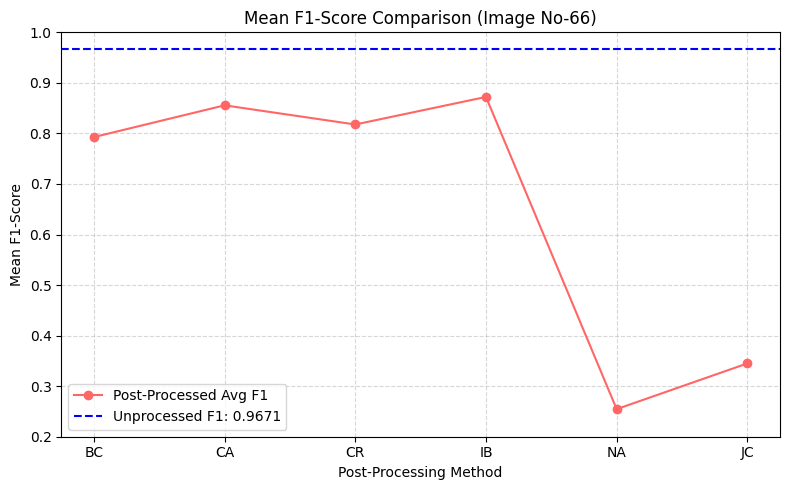

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load pp-66 file
df_pp51 = pd.read_csv("../Results/DCT/pp-51.csv")

# Load UNET summary to get unprocessed F1 scores
df_unprocessed = pd.read_csv("../Results/DCT/Summary-DCT.csv")

# Find the specific image used (e.g., 066_F.png) from pp-66
base_image_name = "051_F.png"
unprocessed_f1 = df_unprocessed[df_unprocessed['Image Name'] == base_image_name]['F1-Score'].values[0]

# Post-processing categories and patterns
pp_categories = {
    'BC': ['BC1', 'BC2', 'BC3'],
    'CA': ['CA1', 'CA2', 'CA3'],
    'CR': ['CR1', 'CR2', 'CR3'],
    'IB': ['IB1', 'IB2', 'IB3'],
    'NA': ['NA1', 'NA2', 'NA3'],
    'JC': ['JC1', 'JC2', 'JC3']
}

avg_f1_scores = []

# Calculate mean F1-Score for each category
for pp_type, variants in pp_categories.items():
    subset = df_pp51[df_pp51['Image Name'].str.contains('|'.join(variants))]
    mean_f1 = subset['F1-Score'].mean()
    avg_f1_scores.append(round(mean_f1, 4))

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(list(pp_categories.keys()), avg_f1_scores, marker='o', linestyle='-', color='#FF6666', label='Post-Processed Avg F1')
plt.axhline(y=unprocessed_f1, color='blue', linestyle='--', label=f'Unprocessed F1: {round(unprocessed_f1, 4)}')

plt.ylim(0.2, 1.0)
plt.xlabel('Post-Processing Method')
plt.ylabel('Mean F1-Score')
plt.title('Mean F1-Score Comparison (Image No-66)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

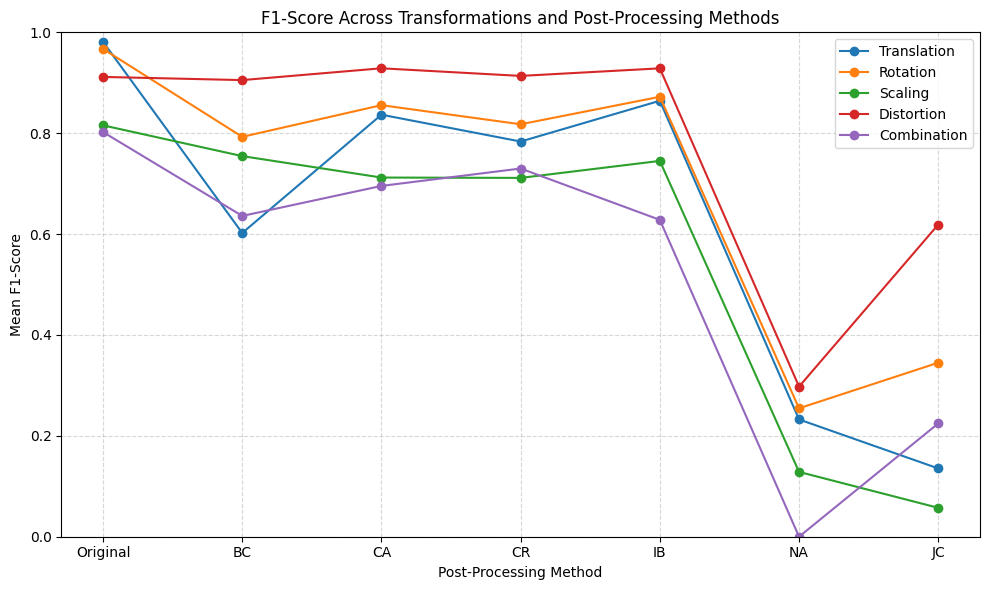

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Transformation-specific files and base image names
transformations = {
    'Translation': {'file': '../Results/DCT/pp-13.csv', 'base_image': '013_F.png'},
    'Rotation': {'file': '../Results/DCT/pp-51.csv', 'base_image': '051_F.png'},
    'Scaling': {'file': '../Results/DCT/pp-120.csv', 'base_image': '120_F.png'},
    'Distortion': {'file': '../Results/DCT/pp-159.csv', 'base_image': '159_F.png'},
    'Combination': {'file': '../Results/DCT/pp-183.csv', 'base_image': '183_F.png'}
}

# Load unprocessed summary once
df_unprocessed = pd.read_csv("../Results/DCT/Summary-DCT.csv")

# Post-processing categories
pp_categories = {
    'BC': ['BC1', 'BC2', 'BC3'],
    'CA': ['CA1', 'CA2', 'CA3'],
    'CR': ['CR1', 'CR2', 'CR3'],
    'IB': ['IB1', 'IB2', 'IB3'],
    'NA': ['NA1', 'NA2', 'NA3'],
    'JC': ['JC1', 'JC2', 'JC3'],
}

plt.figure(figsize=(10, 6))

# Loop through each transformation
for trans_name, info in transformations.items():
    df_pp = pd.read_csv(info['file'])
    base_image_name = info['base_image']
    unprocessed_f1 = df_unprocessed[df_unprocessed['Image Name'] == base_image_name]['F1-Score'].values[0]

    avg_f1_scores = [round(unprocessed_f1, 4)]  # Start with unprocessed

    for pp_type, variants in pp_categories.items():
        subset = df_pp[df_pp['Image Name'].str.contains('|'.join(variants))]
        mean_f1 = subset['F1-Score'].mean()
        avg_f1_scores.append(round(mean_f1, 4))

    # Plot line for this transformation
    plt.plot(['Original'] + list(pp_categories.keys()), avg_f1_scores, marker='o', label=trans_name)

plt.ylim(0.0, 1.0)  # Updated Y-axis minimum value
plt.xlabel('Post-Processing Method')
plt.ylabel('Mean F1-Score')
plt.title('F1-Score Across Transformations and Post-Processing Methods')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()